# Chapter 7: Alternative Risk Transfer 


Alternative risk transfer (ART) programs provide businesses with stronger incentives to manage their risks by retaining a significant portion of those risks, potentially leading to savings in risk management expenses. This chapter is organized into three main sections.

First, we will explore captive insurance, where a firm retains a substantial risk. Next, we will delve into various loss-sensitive insurance contracts, including: 1) Experience-rated policies; 2) Large-deductible contracts; 3) Retrospectively rated policies; 4) Finite risk contracts. 

Although these contracts differ, they all motivate businesses to better monitor their losses by adjusting the insurance price based on the organization's actual loss experience. The final section of this chapter covers insurance-linked securities, primarily focusing on: 1) Catastrophe bonds; 2) Weather derivatives.

These ART products significantly extend the boundaries of traditional insurance markets, offering innovative solutions for risk management.

Chapter Objectives:

1. Introduce alternative risk transfer programs
2. Discuss captive insurance
3. Examine different loss-sensitive contracts:
   * Experience-rated policies
   * Large-deductible contracts
   * Retrospectively rated policies
   * Finite risk contracts
4. Understand how catastrophe bonds work
5. Explore weather derivatives

In [1]:
import pandas as pd

# create a Pandas DataFrame as a placeholder
years={"year1":[0],"year2":[0]}
df = pd.DataFrame(years, index=['Balance from the year before'])
# Initial capital investments in the two years
investment=[15,0]
# Claim payments in the two years
claims=[-10,-3]
# Iterature through two years to fill in items
for year in (1,2):
    # year 2 beginning balance is year 1 end balance
    if year==2:    
        df.loc["Balance from the year before",f'year{year}']=\
            df.loc["End balance",f'year{year-1}']    
    # Fill in the values of initial capital investments        
    df.loc["Initial investment",f'year{year}']=investment[year-1]
    # Premiums received each year
    df.loc["Premium received",f'year{year}']=5
    # Reinsurance premium each year
    df.loc["Reinsurance premium",f'year{year}']=-0.5   
    # Beginning of the year balance is the sum of above items
    df.loc["Balance at the beginning of the year",f'year{year}']=\
      df.loc['Balance from the year before':"Reinsurance premium",   
               f'year{year}'].sum()      
    # Interest income is 4% of beginning balance      
    df.loc["Interest income",f'year{year}']=0.04*\
      df.loc["Balance at the beginning of the year",f'year{year}'] 
    # Claim payment each year
    df.loc["Claim payment",f'year{year}']=claims[year-1]  
    # End balance is the sum of the above three items 
    df.loc["End balance",f'year{year}']=\
    df.loc['Balance at the beginning of the year':"Claim payment"   
               , f'year{year}'].sum()  
# Print out the final results, keeping 2 digits after decimal  
print(df.apply(lambda x: round(x, 2)))


                                      year1  year2
Balance from the year before           0.00  10.28
Initial investment                    15.00   0.00
Premium received                       5.00   5.00
Reinsurance premium                   -0.50  -0.50
Balance at the beginning of the year  19.50  14.78
Interest income                        0.78   0.59
Claim payment                        -10.00  -3.00
End balance                           10.28  12.37


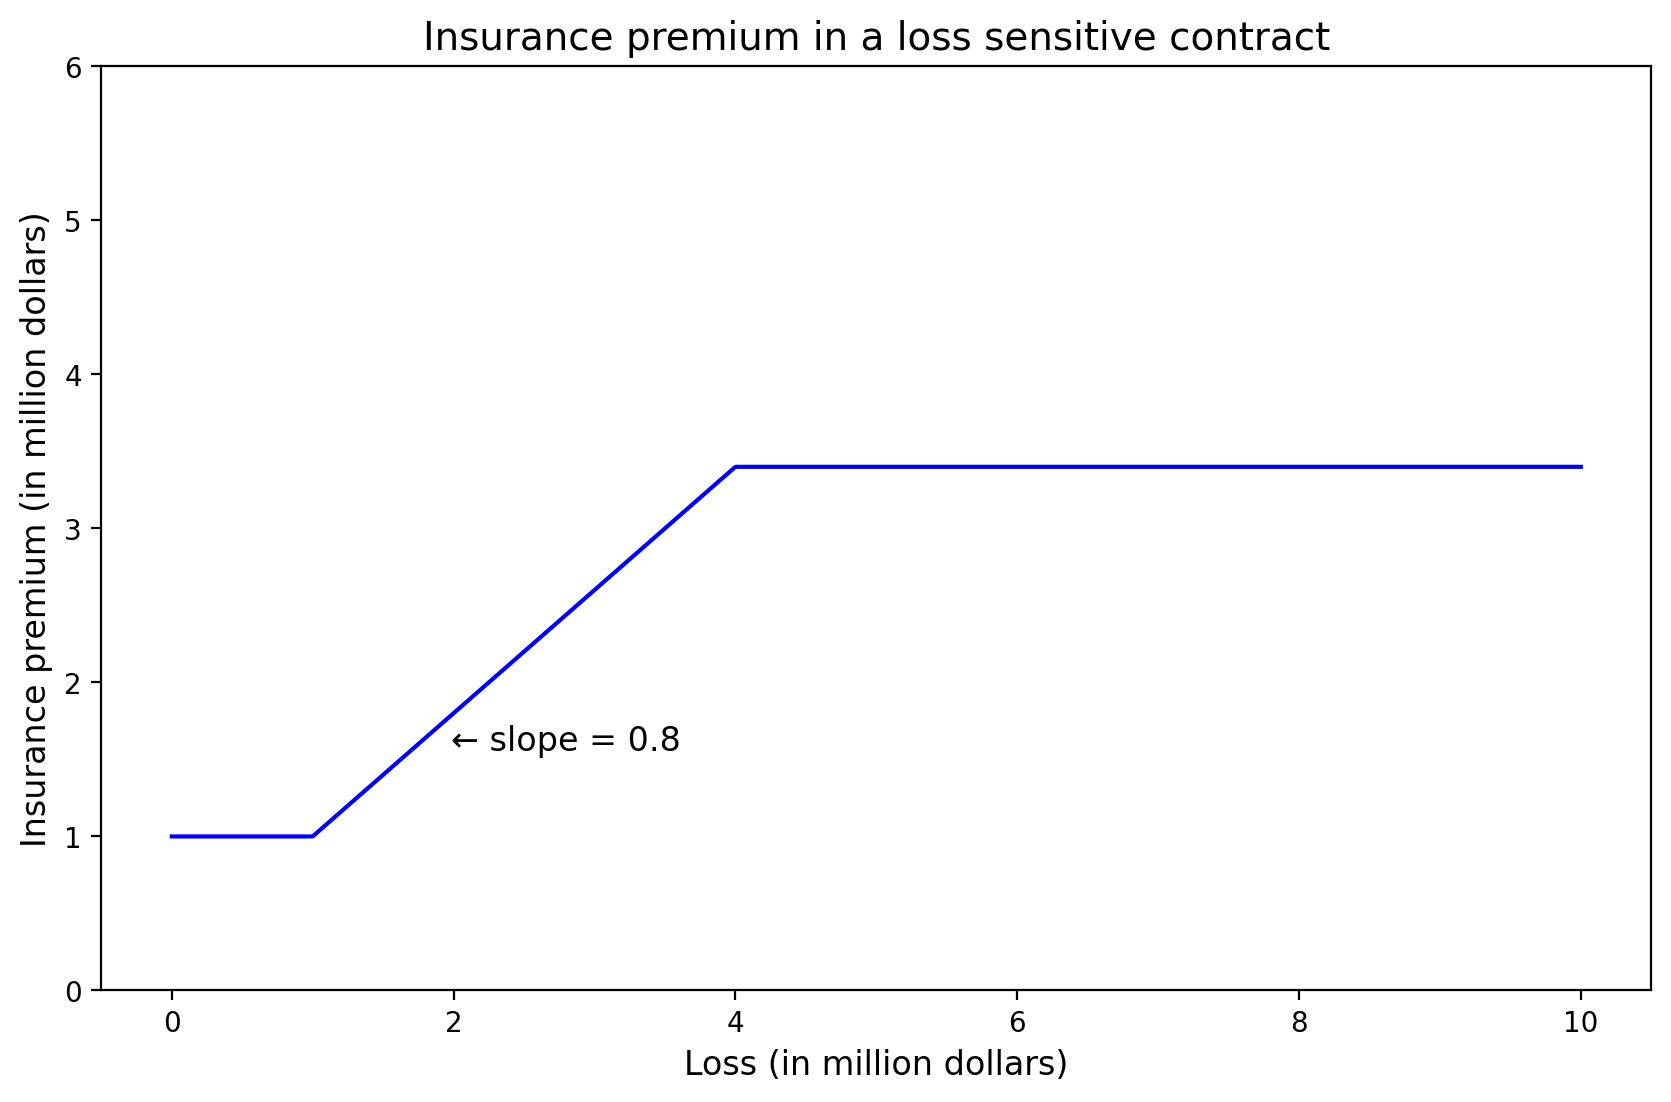

In [2]:
import numpy as np
import matplotlib.pyplot as plt

loss = np.linspace(0,10,1000)
premium = np.zeros((1000,))

for i in range(1000):
    if loss[i]<1:
        premium[i]=1
    elif loss[i]<4:
        premium[i]=1 + 0.8*(loss[i]-1)
    else:
        premium[i]=3.4

fig = plt.figure(dpi=200, figsize=(10,6))
axes = plt.gca()
axes.set_ylim([0,6])
plt.plot(loss, premium, color='blue', label='portfolio return')
plt.xlabel('Loss (in million dollars)',fontsize=12)
plt.ylabel('Insurance premium (in million dollars)',fontsize=12)
plt.title('Insurance premium in a loss sensitive contract',fontsize=14)
plt.figtext(0.3,0.31,'← slope = 0.8',size=12)
plt.show()    


In [3]:
!pip install openpyxl
import pandas as pd

file = 'files/finite_risk_contracts.xlsx' #1

df = pd.read_excel(file,index_col='items') #2
df.loc['Payment to the insured'] = [-2000,-10000,-3000]
df.loc['Insurance premium'] = [3000,3000,3000]
df.loc['Fee'] = -0.08*df.loc['Insurance premium']

for year in (1,2,3):  #3
    df_yr = df[f'Year {year}'] #4
    if year==1:
        df_yr['Previous year balance'] = 0  #5
    else:
        df_yr['Previous year balance'] =\
         df[f'Year {year-1}']['End-year balance']  #6
    df_yr['Beginning balance'] = df_yr['Previous year balance':'Fee'].sum()
    df_yr['Interest earned'] = int(0.05*df_yr['Beginning balance'])   # 7                                    
    df_yr['End-year balance'] = df_yr['Beginning balance']+\
        df_yr['Payment to the insured':'Interest earned'].sum()                                    

print(df)  #8
df.to_excel('files/finite_risk_contracts_filled.xlsx',
    index=True,sheet_name='filled')    



     ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
     --------------- ---------------------- 102.4/250.9 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 250.9/250.9 kB 3.9 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
                        Year 1  Year 2  Year 3
items                                         
Year Beginning                                
Previous year balance        0   898.0 -6160.0
Insurance premium         3000    3000    3000
Fee                     -240.0  -240.0  -240.0
Beginning balance       2760.0  3658.0 -3400.0
Year End                                      
Payment to the insured   -2000  -10000   -3000
Interest earned            138     182    -170
End-year balance         898.0 -6160.0 -6570.0


In [4]:
import numpy_financial as npf
price=npf.pv(0.1,3,-0.07*200_000_000,-200_000_000)
print(f"the price of the bond is ${price:.2f}")
# annual interest in case of a partial loss
interest=0.07*200_000_000*0.5
print(f"interest payment in partial loss is ${interest:.2f}")
# annual interest in case of a total loss
interest=0.07*200_000_000*0
print(f"interest payment in total loss is ${interest:.2f}")


the price of the bond is $185078888.05
interest payment in partial loss is $7000000.00
interest payment in total loss is $0.00


In [5]:
temperatures = [60, 58, 66, 69, 63, 67, 61]
base_temperature = 65
HDD=0
CDD=0
for t in temperatures:
    HDD += 20*max(base_temperature-t,0)
    CDD += 20*max(t-base_temperature,0)
print(f"the value of HDD is {HDD}")
print(f"the value of CDD is {CDD}")


the value of HDD is 360
the value of CDD is 140
